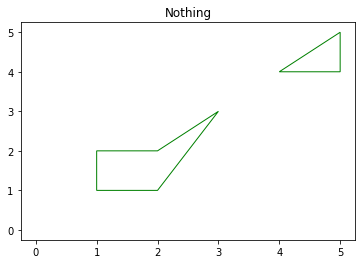

In [13]:
#-*-coding:utf-8-*-
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt


vertices = []
codes = []

# 由 [Path.MOVETO] 为 起点 
# 经由 4个 [Path.LINETO] 
codes = [Path.MOVETO] + [Path.LINETO]*4 + [Path.CLOSEPOLY]
vertices = [(1, 1), (1, 2), (2, 2), (3,3),(2, 1), (0, 0)]

codes += [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices += [(4, 4), (5, 5), (5, 4), (0, 0)]

vertices = np.array(vertices, float)
path = Path(vertices, codes)

pathpatch = PathPatch(path, facecolor='None', edgecolor='green')

fig, ax = plt.subplots()
ax.add_patch(pathpatch)
ax.set_title("Nothing")

ax.dataLim.update_from_data_xy(vertices)
ax.autoscale_view()

# plt.savefig("conpund.png")
plt.show()

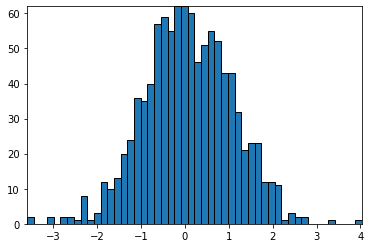

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()

#############################################################################
# It should be noted that instead of creating a three-dimensional array and
# using `~.path.Path.make_compound_path_from_polys`, we could as well create
# the compound path directly using vertices and codes as shown below

nrects = len(left)
nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)

### 参考资料
[matplotlib之path](https://my.oschina.net/u/2474629/blog/1793691)